<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-21849-1659792778/blob/main/Assignment/Girishun_Kumar_R/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Augmentation**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [7]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


**Create model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model = Sequential()

**Convolution layer**

In [10]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**Maxpooling **

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [12]:
model.add(Flatten())

**Dense layer**

In [13]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(300,activation='relu')) #hiddenlayer 2
model.add(Dense(150,activation='relu')) #hiddenlayer 3

**Output layer**

In [14]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 762s 17s/step - loss: 1.4302 - accuracy: 0.3963 - val_loss: 1.1770 - val_accuracy: 0.5279
Epoch 2/10
44/44 [==============================] - 63s 1s/step - loss: 1.1447 - accuracy: 0.5305 - val_loss: 1.0824 - val_accuracy: 0.5784
Epoch 3/10
44/44 [==============================] - 61s 1s/step - loss: 1.0505 - accuracy: 0.5740 - val_loss: 1.1215 - val_accuracy: 0.5583
Epoch 4/10
44/44 [==============================] - 62s 1s/step - loss: 0.9966 - accuracy: 0.6062 - val_loss: 1.2679 - val_accuracy: 0.5363
Epoch 5/10
44/44 [==============================] - 59s 1s/step - loss: 0.9594 - accuracy: 0.6157 - val_loss: 1.0841 - val_accuracy: 0.5768
Epoch 6/10
44/44 [==============================] - 62s 1s/step - loss: 0.8980 - accuracy: 0.6509 - val_loss: 0.9225 - val_accuracy: 0.6505
Epoch 7/10
44/44 [==============================] - 60s 1s/step - loss: 0.8528 - accuracy: 0.6711 - val_loss: 0.8543 - val_accuracy: 0.6813
Epoch 8/10
44/44 [

**Saving**

In [17]:
model.save('Flowers.h5')

**Testing the model**

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
img = image.load_img('/content/drive/MyDrive/flowers/daisy/147068564_32bb4350cc.jpg',target_size=(64,64))

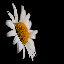

In [24]:
img

In [25]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
x = np.expand_dims(x,axis=0)
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [27]:
model.predict(x)

1/1 [==============================] - 0s 151ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 40ms/step


'daisy'